In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
from aemulusnu_massfunction.emulator import *
from aemulusnu_massfunction.fisher_utils import *

loading emulator from /home/users/delon/aemulusnu_massfunction/aemulusnu_massfunction/emulator.pkl


In [3]:
fiducial_cosmology = {'10^9 As':2.09681,
                      'ns': 0.9652,
                      'H0': 67.37,
                      'w0': -1,
                      'ombh2': 0.02233,
                      'omch2': 0.1198,
                      'nu_mass_ev': 0.00,}

fiducial_cosmo_vals = get_cosmo_vals(fiducial_cosmology)

fiducial_ccl_cosmo = get_ccl_cosmology(tuple(fiducial_cosmo_vals))


In [4]:
emulator = AemulusNu_HMF_Emulator()

loading emulator from /home/users/delon/aemulusnu_massfunction/aemulusnu_massfunction/emulator.pkl


In [5]:
M = 10**np.linspace(11, 16, 150)

In [6]:
h = fiducial_cosmology['H0']/100

In [7]:

def plot_stuff(curr_redshift):
    hmfs = []
    # Press & Schechter mass function
    hmfs.append(ccl.halos.MassFuncPress74(mass_def='200m', mass_def_strict=False))

    # Sheth & Tormen mass function
    hmfs.append(ccl.halos.MassFuncSheth99(mass_def='200m', mass_def_strict=False))

    # Tinker 2008 mass function
    hmfs.append(ccl.halos.MassFuncTinker08(mass_def='200m', mass_def_strict=False))


    # Bocquet 2016 mass function
    hmfs.append(ccl.halos.MassFuncBocquet16(mass_def='200m'))

    # Our emulator
    hmfs.append(emulator)
    # # Bocquet 2020 mass function
    # hmfs.append(ccl.halos.MassFuncBocquet20(mass_def='200m', mass_def_strict=False))

    # Let's plot all of them at z=0
    plt.figure()
    for mf in tqdm(hmfs):
        nm = mf(fiducial_ccl_cosmo, M/h, redshiftToScale(curr_redshift))
        if('Aemulus' not in mf.name):
            plt.plot(M, nm/(h**3 * M * np.log(10)), '--', label=mf.name)
        else:
            plt.plot(M, nm/(h**3 * M * np.log(10)), 'k-', label=mf.name)

    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e-36, 1e-12)
    plt.xlim(1e11, 1e16)
    plt.ylabel('$dn/dM\ [h^4/ Mpc^3 M_\odot]$')
    plt.title(r'$z=%.1f$'%(curr_redshift))
    plt.legend(frameon=False)
    plt.show()

    dn_dM = emulator(fiducial_ccl_cosmo, M/h, redshiftToScale(curr_redshift))/(h**3 * M * np.log(10))
    # Let's plot all of them at z=0
    plt.figure()
    for mf in hmfs:
        nm = mf(fiducial_ccl_cosmo, M/h, redshiftToScale(curr_redshift))
        plt.plot(M, nm/(h**3 * M * np.log(10))/dn_dM, '--', label=mf.name)

    plt.plot(M, np.ones_like(dn_dM), 'k',label='emulator')
    plt.xscale('log')
    # plt.yscale('log')
    # plt.ylim(1e-36, 1e-12)
    plt.ylim(0, 2)
    plt.xlim(1e11, 1e16)
    plt.ylabel('$dn/dM\ [h^4/ Mpc^3 Msun]$')
    plt.legend(frameon=False)
    plt.title(r'$z=%.1f$'%(curr_redshift))

    plt.show()

100%|██████████| 5/5 [00:00<00:00, 12.78it/s]


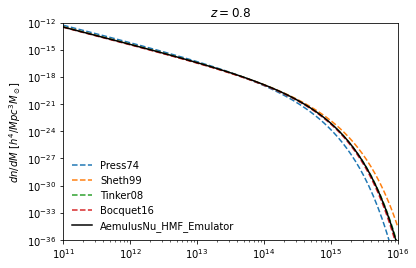

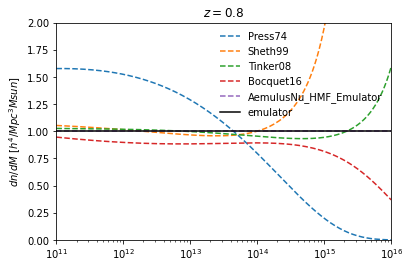

In [8]:
plot_stuff(0.8)

100%|██████████| 5/5 [00:00<00:00, 372.97it/s]


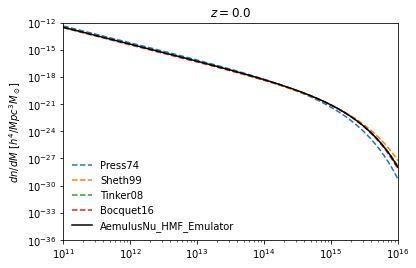

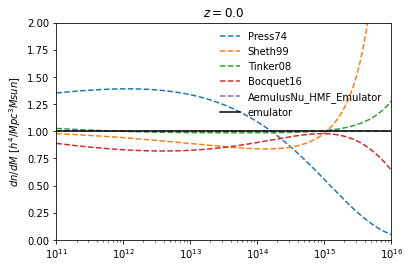

In [9]:
plot_stuff(0.00)

100%|██████████| 5/5 [00:00<00:00, 380.73it/s]


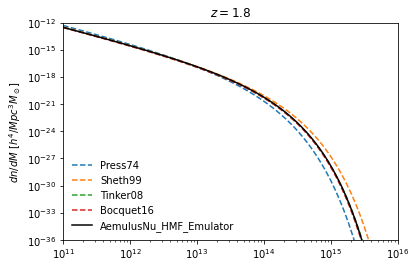

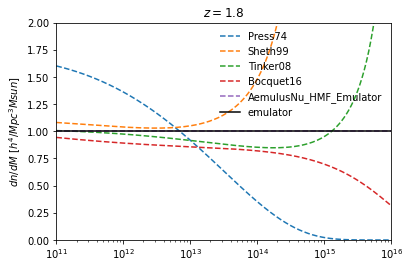

In [10]:
plot_stuff(1.8)